## Primeros modelos KERAS sobre MNIST

Vamos a implementar las primeras redes neuronales para el conjunto de datos MNIST

IMPORTAMOS el Dataset y lo normalizamos:

In [1]:
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('training set', x_train.shape)
print('test set', x_test.shape)

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize [0..255]-->[0..1]
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 2s 0us/step
training set (60000, 28, 28)
test set (10000, 28, 28)


## Modelos secuenciales en KERAS

Los modelos secuenciales son modelos donde las capas se van añadiendo una tras otra. Te permite crear topologías básicas sin conexiones que no sean estrictamente lineales.

La red neuronal a crear es la siguiente:

- Capa de entrada de 784 neuronas, acorde con la dimensionalidad de los datos
- Capa oculta de 512 neuronas, con función de activación ReLU la funcion de activacion no puede ser lineal
La ReLU para valores negativos es siempre 0 y para cualquier valor positivo devuelve el mismo valor
- Capa de salida de 10 neuronas, acorde con el número de clases. Al ser un problema de clasificación emplearemos la función de activación Softmax

Este sería la definición del modelo:

In [2]:
from keras import Sequential
from keras.layers import Dense, Input

model = Sequential()
#capa de entrada de 784 dimensiones
model.add(Input(784))
#capa densa de 512 y aplicando la activacion relu matriz por el vector y dsp aplico la relu
model.add(Dense(512, activation='relu'))
#añandes otra densa de 10 clases y activacion softmax
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


![model summary](https://github.com/CarlosIvars/APR/blob/main/P1/summary.png?raw=1)

El summary del modelo nos lista las diferentes capas del mismo así como su número de parámetros. Por ejemplo la capa densa oculta tiene 784 entradas x 512 salidas lo que implica una matriz de 784x512 = 401408 componentes. Además esta capa Dense tiene un vector de bias de 512 componentes, por lo tanto en total son 401408+512 = **401920**, que coincide con el número de parámetros de la tabla para dicha capa.

Podemos generar una imagen con la topología del modelo:

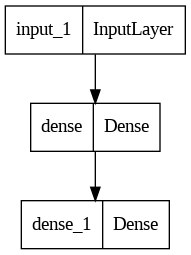

In [3]:
keras.utils.plot_model(model, to_file="model.png")

## Compilar el modelo

Para terminar la definición de nuestro modelo debemos definir dos componentes muy importantes:

1. Función de pérdida. En nuestro caso al ser un problema de clasificación emplearemos la **categorical_crossentropy**
2. Optimizador. En nuestro caso y para empezar emplearemos un sencillo descenso por gradiente estocástico **SGD**

opcionalmente:

3. Definir una métrica asociada a la calidad del modelo. En nuestro caso sería la tasa de acierto **accuracy**


Una vez definidos pasamos a compilar el modelo:

In [4]:
from keras.optimizers import SGD
#constante de aprendizaje theta
sgd=SGD(learning_rate=0.01, momentum=0.9)

# Compile Model la categorica mide como de mal esta mal los reultados en base a los resultados que queremos
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              #metrica para ver como evoluciona, la accuracy no puedes aplicar un gradiente, ya q te devuelve el maximo
              metrics=['accuracy'])



## Entrenar el modelo

Una vez tenemos los datos cargados y normalizados, así como el modelo ya compilado, podemos realizar el entrenamiento mediante el método **fit**. Para ello previamente necesitamos definir el tamaño del batch así como el número de epochs.

Al mismo tiempo que entrenamos el modelo con los datos de entrenamiento vamos a ir evaluando dicho modelo sobre los datos de test. Además, vamos generando un **history** con la evolución del modelo para luego poder crear gráficas del mismo.

In [5]:
#cuantas de las 60000 le enseño cada vez, en este caso 32
batch_size=32
#cuantas veces le ensño los 60K datos, una iteracion es 1 epoch
epochs=25

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 12s 4ms/step - loss: 0.2893 - accuracy: 0.9177 - val_loss: 0.1547 - val_accuracy: 0.9542
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1309 - accuracy: 0.9627 - val_loss: 0.1182 - val_accuracy: 0.9649
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0911 - accuracy: 0.9742 - val_loss: 0.0880 - val_accuracy: 0.9738
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0687 - accuracy: 0.9805 - val_loss: 0.0792 - val_accuracy: 0.9756
Epoch 5/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0547 - accuracy: 0.9843 - val_loss: 0.0761 - val_accuracy: 0.9774
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0447 - accuracy: 0.9876 - val_loss: 0.0753 - val_accuracy: 0.9767
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0364 - accuracy: 0.9901 - val_loss: 0.0629 - val_accuracy

## Explorar el History

Realizar gráfica con resultados de accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


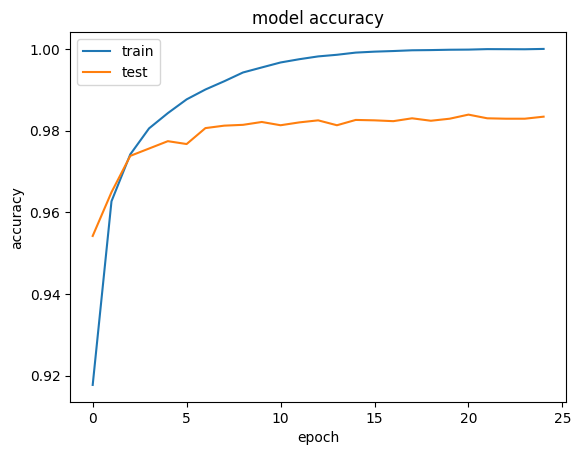

In [6]:
print(history.history.keys())

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



Realizar gráfica con resultados de loss

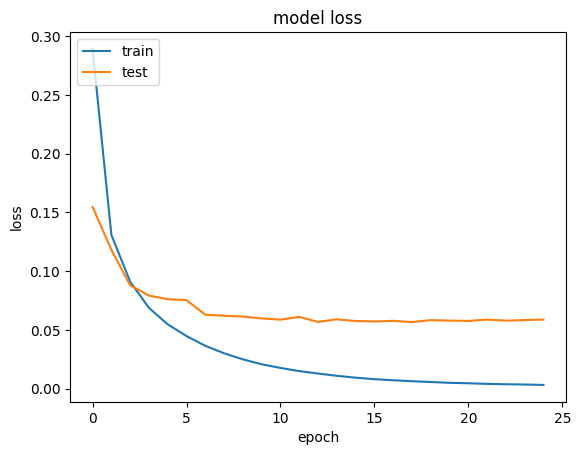

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Ejercicio**

probar diferentes entrenamientos dependiendo de los siguientes valores y anotar el accuracy en test alcanzado

| Dense/Batch  | 16  | 32  |  64 | 128  |
|---|---|---|---|---|
|  256  |   |   |   |   |
|  512  |   |   |   |   |
|  1024 |   |   |   |   |

# Salvar y cargar el modelo

Normalmente necesitaremos salvar el modelo entrenado para emplearlo más tarde en producción (inferencia)



In [11]:
# Cargar datos y normalizar
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('training set', x_train.shape)
print('test set', x_test.shape)

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# crear modelo y entrenar
from keras import Sequential
from keras.layers import Dense, Input
from keras.models import load_model

for dense in [256,512,1024]:
  model = Sequential()
  model.add(Input(784))
  model.add(Dense(dense, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.summary()

  from keras.optimizers import SGD

  sgd=SGD(learning_rate=0.01, momentum=0.9)

  model.compile(loss='categorical_crossentropy',
                optimizer=sgd,
                metrics=['accuracy'])
  model.save(str(dense) + "model.keras")


  epochs=25
  for batch_size in [16,32,64,128]:
    model = load_model(str(dense) + "model.keras")
    history = model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_data=(x_test, y_test))


    # guardar modelo
    model.save(dense + batch_size + "model.keras")

# cargar modelo
from keras.models import load_model
model = load_model("model.keras")

# evaluar modelo
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


training set (60000, 28, 28)
test set (10000, 28, 28)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/25
3750/3750 [==============================] - 13s 3ms/step - loss: 0.2300 - accuracy: 0.9331 - val_loss: 0.1335 - val_accuracy: 0.9585
Epoch 2/25
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0990 - accuracy: 0.9706 - val_loss: 0.0978 - val_accuracy: 0.9705
Epoch 3/25
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0682 - accuracy: 0.9797 - val_loss: 0.0756 - val_accuracy: 0.9776
Epoch 4/25
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0496 - accuracy: 0.9849 - val_loss: 0.0704 - val_accuracy: 0.9784
Epoch 5/25
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0380 - accuracy: 0.9891 - val_loss: 0.0665 - val_accuracy: 0.9808
Epoch 6/25
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0295 - accuracy: 0.9912 - val_loss: 0.0666 - val_accuracy: 0.9798
Epoch 7/25
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0221 - accuracy: 0.9937 - val_loss: 0.0661 - val_ac

KeyboardInterrupt: ignored